In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#read in data
dfComplete = pd.read_csv("dublinbikes_20200101_20200401.csv")

def preprocessStation(stationID):
    #select station by ID
    dfStation = dfComplete.loc[dfComplete['STATION ID'] == stationID]
    #drop unwanted features
    dfStation = dfStation.drop(columns=['STATION ID', 'BIKE STANDS','STATUS','ADDRESS','LATITUDE','LONGITUDE','NAME','LAST UPDATED','AVAILABLE BIKE STANDS'])
    
    #change datatype to datetime64
    dfStation["TIME"] = dfStation["TIME"].astype("datetime64")
    dfStation = dfStation.set_index(pd.DatetimeIndex(dfStation['TIME']))
    dfStation = dfStation.asfreq(freq='300S',method='pad')
    dfStation = dfStation.drop(columns=['TIME'])
    #delete alternating rows
    dfStation = dfStation.iloc[::2]
    dfStation = dfStation.reset_index()
    
    return dfStation


dfPortobello = preprocessStation(34)
dfSLS = preprocessStation(21)


In [2]:
def plotWeekdays(df,myTitle):
    for currWeekDay in range (0,5):
        currDf = df[(df["TIME"].dt.dayofweek == currWeekDay)]
        currDf.groupby(currDf["TIME"].dt.hour)["AVAILABLE BIKES"].mean().plot(figsize=(8,5),xlabel="HOUR",ylabel="AVAILABLE BIKES",legend=True,title=myTitle)
        plt.legend(["Monday", "Tuesday","Wednesday","Thursday","Friday"])

def plotWeekends(df,myTitle):
    for currWeekDay in range (5,7):
        currDf = df[(df["TIME"].dt.dayofweek == currWeekDay)]
        currDf.groupby(currDf["TIME"].dt.hour)["AVAILABLE BIKES"].mean().plot(figsize=(8,5),xlabel="HOUR",ylabel="AVAILABLE BIKES",title=myTitle)
        plt.legend(["Saturday","Sunday"])

def plotDaysOfYear(df,myTitle):
    df.groupby(df["TIME"].dt.dayofyear)["AVAILABLE BIKES"].mean().plot(figsize=(8,5),xlabel="DAY OF YEAR",ylabel="AVERAGE AVAILABLE BIKES",legend=True,style="-o",title=myTitle)


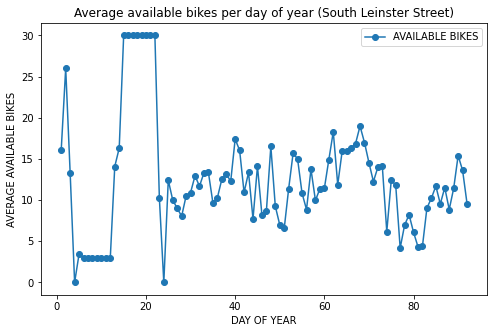

In [3]:
plotDaysOfYear(dfSLS,"Average available bikes per day of year (South Leinster Street)")

In [4]:
# select timeframe
dfPortobello = dfPortobello[(dfPortobello['TIME'] >= '2020-01-25T07:25:02') & (dfPortobello['TIME'] <= '2020-04-01T23:55:02')]
dfSLS = dfSLS[(dfSLS['TIME'] >= '2020-01-25T07:25:02') & (dfSLS['TIME'] <= '2020-04-01T23:55:02')]
PortobelloNan = dfPortobello['AVAILABLE BIKES']
print(PortobelloNan.isna().sum())
SLSNan = dfSLS['AVAILABLE BIKES']
print(SLSNan.isna().sum())


0
0


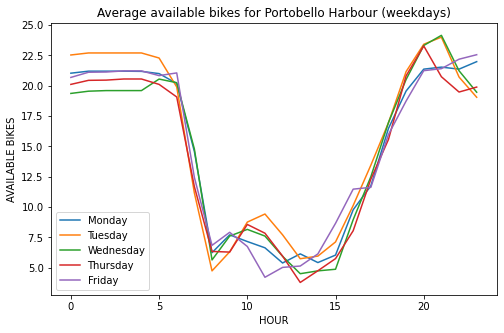

In [5]:
plotWeekdays(dfPortobello,"Average available bikes for Portobello Harbour (weekdays)")
#dfPortobello.groupby(dfPortobello["TIME"].dt.hour)["AVAILABLE BIKES"].mean().plot(figsize=(12,4))

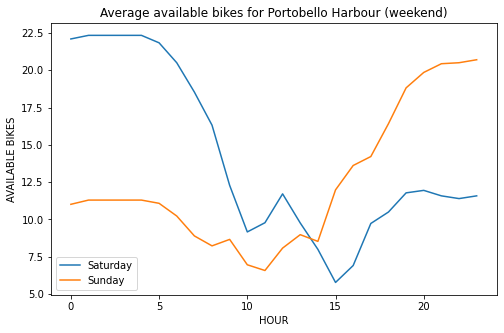

In [6]:
plotWeekends(dfPortobello,"Average available bikes for Portobello Harbour (weekend)")

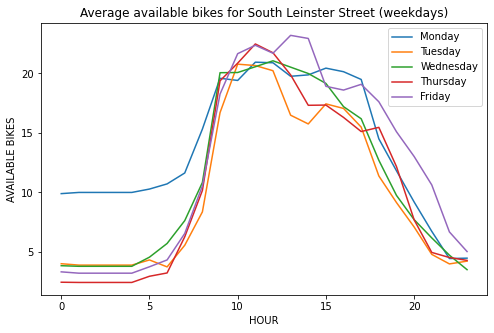

In [7]:
plotWeekdays(dfSLS,"Average available bikes for South Leinster Street (weekdays)")

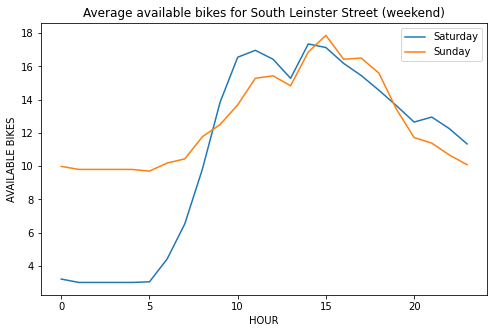

In [8]:
plotWeekends(dfSLS,"Average available bikes for South Leinster Street (weekend)")

<AxesSubplot:title={'center':'Available bikes from 25th Jan to 1st April (Portobello Harbour)'}, xlabel='TIME', ylabel='AVAILABLE BIKES'>

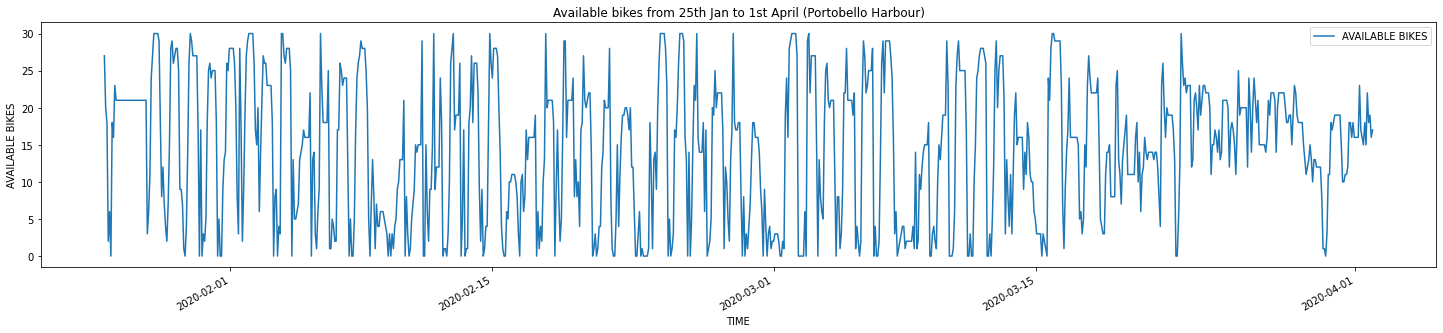

In [9]:
dfTest = dfPortobello
dfTest = dfTest.iloc[::10]
dfTest.plot(x="TIME",y="AVAILABLE BIKES",figsize=(25,5),style='-',ylabel="AVAILABLE BIKES",title="Available bikes from 25th Jan to 1st April (Portobello Harbour)")


<AxesSubplot:title={'center':'Available bikes from 25th Jan to 1st April (South Leinster Street)'}, xlabel='TIME', ylabel='AVAILABLE BIKES'>

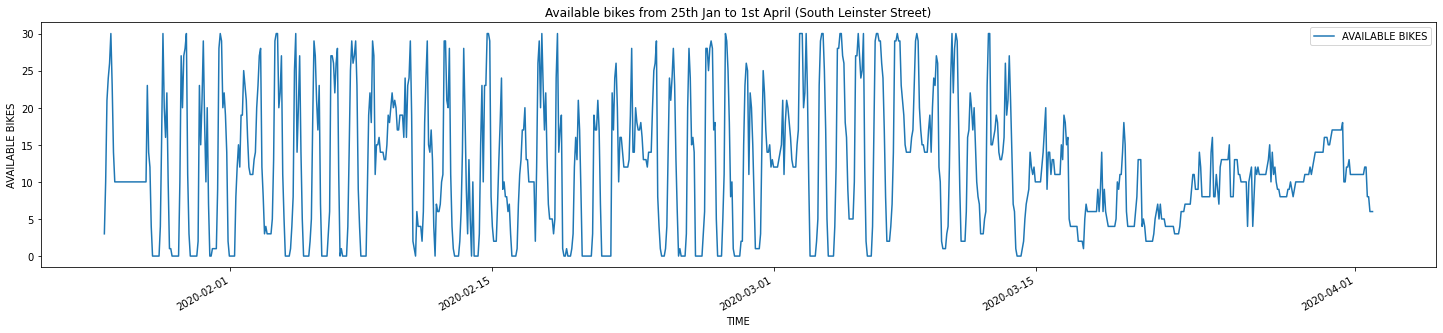

In [10]:
dfTest = dfSLS
dfTest = dfTest.iloc[::10]
dfTest.plot(x="TIME",y="AVAILABLE BIKES",figsize=(25,5),style='-',ylabel="AVAILABLE BIKES",title="Available bikes from 25th Jan to 1st April (South Leinster Street)")

In [11]:
def createFeatures(inputDf):
    df = inputDf.copy()
    df['Lag_1'] = df['AVAILABLE BIKES'].shift(1)
    df['Lag_2'] = df['AVAILABLE BIKES'].shift(2)
    df['Lag_3'] = df['AVAILABLE BIKES'].shift(3)
    df['Lag_4'] = df['AVAILABLE BIKES'].shift(4)
    df['Lag_5'] = df['AVAILABLE BIKES'].shift(5)
    df['Lag_6'] = df['AVAILABLE BIKES'].shift(6)
    df['Lag_7'] = df['AVAILABLE BIKES'].shift(7)
    df['Lag_8'] = df['AVAILABLE BIKES'].shift(8)
    df['Lag_9'] = df['AVAILABLE BIKES'].shift(9)
    df['Lag_10'] = df['AVAILABLE BIKES'].shift(10)
    df['Lag_11'] = df['AVAILABLE BIKES'].shift(11)
    df['Lag_12'] = df['AVAILABLE BIKES'].shift(12)
    df['Lag_13'] = df['AVAILABLE BIKES'].shift(13)
    df['Lag_14'] = df['AVAILABLE BIKES'].shift(14)
    df['Lag_15'] = df['AVAILABLE BIKES'].shift(15)
    df['Lag_16'] = df['AVAILABLE BIKES'].shift(16)
    df['Lag_17'] = df['AVAILABLE BIKES'].shift(17)
    df['Lag_18'] = df['AVAILABLE BIKES'].shift(18)
    df['Lag_19'] = df['AVAILABLE BIKES'].shift(19)
    df['Lag_20'] = df['AVAILABLE BIKES'].shift(20)
    df['Lag_21'] = df['AVAILABLE BIKES'].shift(144)
    df['Lag_22'] = df['AVAILABLE BIKES'].shift(144*2)
    df['Lag_23'] = df['AVAILABLE BIKES'].shift(144*3)
    df['weekday'] = (df['TIME'].dt.dayofweek >= 0) & (df['TIME'].dt.dayofweek < 5)
    df['weekday'] = df['weekday'].astype(int)
    df['hourly average'] = df['AVAILABLE BIKES'].rolling(window=6).mean()
    df['6 hour average'] = df['AVAILABLE BIKES'].rolling(window=36).mean()
    df['12 hour average'] = df['AVAILABLE BIKES'].rolling(window=72).mean()
    df['daily average'] = df['AVAILABLE BIKES'].rolling(window=144).mean()
    return df

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
def linRegPrediction(inputDf,X,steps,myTitle):
    # shift by how many steps we want to predict in the future
    y = inputDf.loc[:, 'AVAILABLE BIKES'].iloc[432:].shift(-(steps)).squeeze()
    y = y.fillna(method="pad")
    X = X.iloc[432: , :]
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    model = LinearRegression()
    model = Ridge(200.0,fit_intercept=False)
    model.fit(X_train, y_train)
    y_pred = pd.Series(model.predict(X_test), index=y_test.index).round()
    y_pred.plot(figsize=(25,5),style='-')
    y_test.plot(style='--',xlabel="TIME",ylabel="AVAILABLE BIKES",title=myTitle)
    plt.legend(["prediction", "actual data"])
    print(np.sqrt(mean_squared_error(y_test, y_pred)))
    print(model.coef_)

def baselinePrediction(inputDf,X,steps):
    # shift by how many steps we want to predict in the future
    y = inputDf.loc[:, 'AVAILABLE BIKES'].iloc[432:].shift(-(steps)).squeeze()
    y = y.fillna(method="pad")
    X = X.iloc[432: , :]
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    # we use the last seen value as baseline prediction -> we have to shift steps + 1, because y was shifted by (- steps) in the beginning
    # e.g. we use the value from 10 minutes ago to predict the value in 60 minutes
    y_pred = y_test.shift(steps+1)
    y_pred = y_pred.iloc[steps+1: ,]
    y_test = y_test.iloc[steps+1: ,]
    print("baseline:")
    print(np.sqrt(mean_squared_error(y_test, y_pred)))

In [12]:
dfPortobello = createFeatures(dfPortobello)
dfSLS = createFeatures(dfSLS)

3.5566325416742663
[ 0.72538556 -0.57251241 -0.64757868 -0.66347267 -0.64955883 -0.77191993
  4.14414116  0.10861052]
baseline last value:
3.9337209111372333


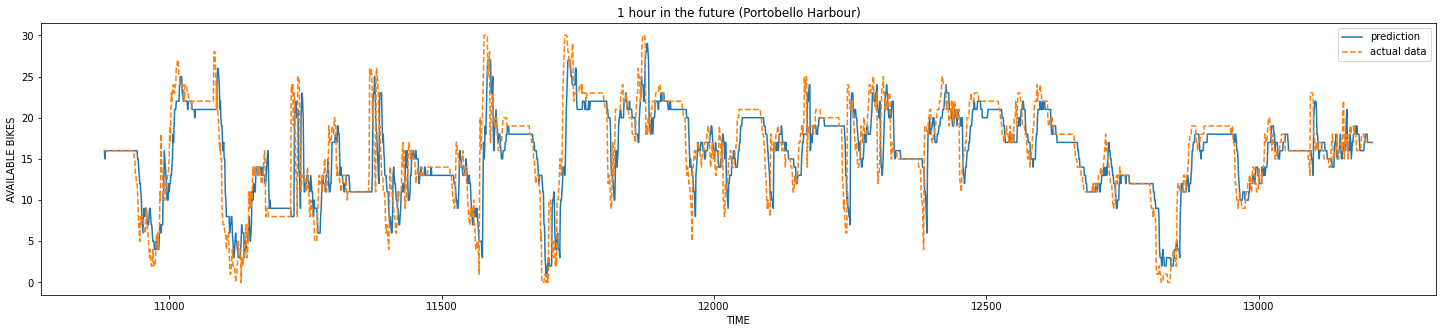

In [448]:

# X = pd.concat((dfPortobello['weekday'],dfPortobello['Lag_1'],dfPortobello['Lag_2'],dfPortobello['Lag_3'],dfPortobello['Lag_4'],dfPortobello['Lag_5'],dfPortobello['Lag_6'],dfPortobello['Lag_7'],dfPortobello['Lag_8'],dfPortobello['Lag_9'],
# dfPortobello['Lag_10'],dfPortobello['Lag_11'],dfPortobello['Lag_12'],dfPortobello['Lag_13'],dfPortobello['Lag_14'],dfPortobello['Lag_15'],dfPortobello['Lag_16'],dfPortobello['Lag_17'],dfPortobello['Lag_18'],dfPortobello['Lag_19']
# ,dfPortobello['Lag_20'],dfPortobello['Lag_21'],dfPortobello['Lag_22'],dfPortobello['Lag_23'],dfPortobello['hourly average'],dfPortobello['6 hour average'],dfPortobello['12 hour average'],dfPortobello['daily average']),axis=1)
X = pd.concat((dfPortobello['weekday'],dfPortobello['Lag_1'],dfPortobello['Lag_2'],dfPortobello['Lag_3'],dfPortobello['Lag_4'],dfPortobello['Lag_5']
,dfPortobello['hourly average'],dfPortobello['daily average']),axis=1)
linRegPrediction(dfPortobello,X,6,"1 hour in the future (Portobello Harbour)")
baselinePrediction(dfPortobello,X,6)


2.686336145984497
[ 0.41013967 -0.62463666 -0.63386718 -0.67128263 -0.68637723 -0.76650712
  4.29609495  0.056742  ]
baseline last value:
3.111269837220809


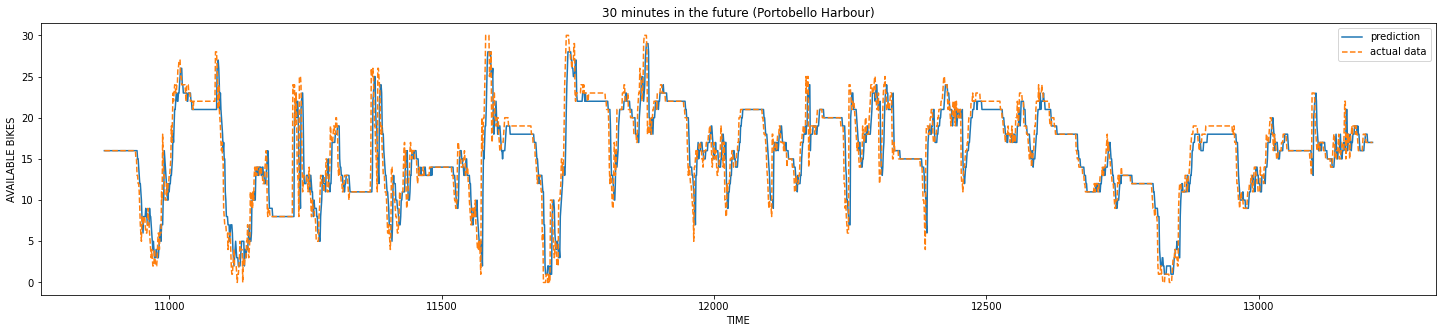

In [440]:
# X = pd.concat((dfPortobello['weekday'],dfPortobello['Lag_1'],dfPortobello['Lag_2'],dfPortobello['Lag_3'],dfPortobello['Lag_4'],dfPortobello['Lag_5'],dfPortobello['Lag_6'],dfPortobello['Lag_7'],dfPortobello['Lag_8'],dfPortobello['Lag_9'],
# dfPortobello['Lag_10'],dfPortobello['Lag_11'],dfPortobello['Lag_12'],dfPortobello['Lag_13'],dfPortobello['Lag_14'],dfPortobello['Lag_15'],dfPortobello['Lag_16'],dfPortobello['Lag_17'],dfPortobello['Lag_18'],dfPortobello['Lag_19']
# ,dfPortobello['Lag_20'],dfPortobello['Lag_21'],dfPortobello['Lag_22'],dfPortobello['Lag_23'],dfPortobello['hourly average'],dfPortobello['6 hour average'],dfPortobello['12 hour average'],dfPortobello['daily average']),axis=1)
X = pd.concat((dfPortobello['weekday'],dfPortobello['Lag_1'],dfPortobello['Lag_2'],dfPortobello['Lag_3'],dfPortobello['Lag_4'],dfPortobello['Lag_5']
,dfPortobello['hourly average'],dfPortobello['daily average']),axis=1)
linRegPrediction(dfPortobello,X,3,"30 minutes in the future (Portobello Harbour)")
baselinePrediction(dfPortobello,X,3)


1.5601576474603949
[ 0.33233844 -0.73543085 -0.83041053 -0.82609853 -0.75118723 -0.86706383
  4.98595145]
baseline last value:
2.2044218561361877


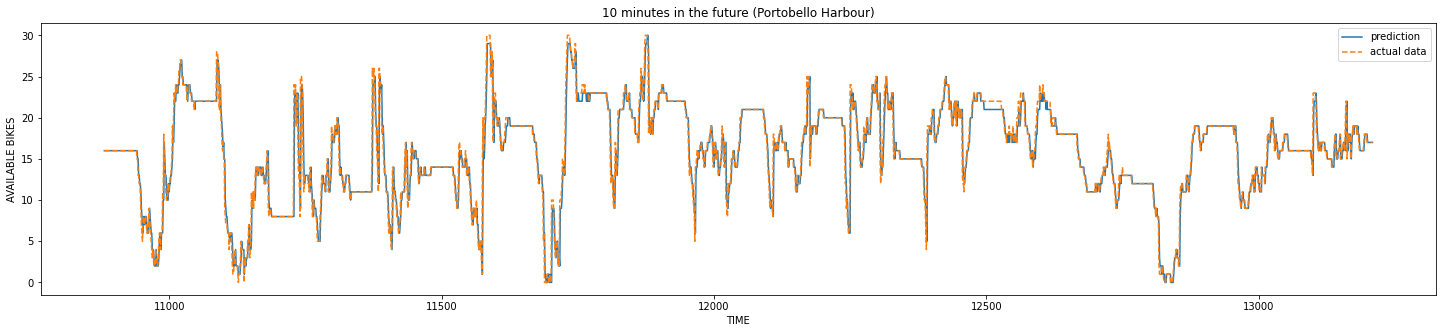

In [441]:
# X = pd.concat((dfPortobello['weekday'],dfPortobello['Lag_1'],dfPortobello['Lag_2'],dfPortobello['Lag_3'],dfPortobello['Lag_4'],dfPortobello['Lag_5'],dfPortobello['Lag_6'],dfPortobello['Lag_7'],dfPortobello['Lag_8'],dfPortobello['Lag_9'],
# dfPortobello['Lag_10'],dfPortobello['Lag_11'],dfPortobello['Lag_12'],dfPortobello['Lag_13'],dfPortobello['Lag_14'],dfPortobello['Lag_15'],dfPortobello['Lag_16'],dfPortobello['Lag_17'],dfPortobello['Lag_18'],dfPortobello['Lag_19']
# ,dfPortobello['Lag_20'],dfPortobello['Lag_21'],dfPortobello['Lag_22'],dfPortobello['Lag_23'],dfPortobello['hourly average'],dfPortobello['6 hour average'],dfPortobello['12 hour average'],dfPortobello['daily average']),axis=1)
X = pd.concat((dfPortobello['weekday'],dfPortobello['Lag_1'],dfPortobello['Lag_2'],dfPortobello['Lag_3'],dfPortobello['Lag_4'],dfPortobello['Lag_5']
,dfPortobello['hourly average']),axis=1)
linRegPrediction(dfPortobello,X,1,"10 minutes in the future (Portobello Harbour)")
baselinePrediction(dfPortobello,X,1)

1.6784185650031875
[-0.54003999 -0.83788557 -0.80518909 -0.80859812 -1.05222039  4.90825658
  0.12721045]
baseline last value:
1.798650082384856


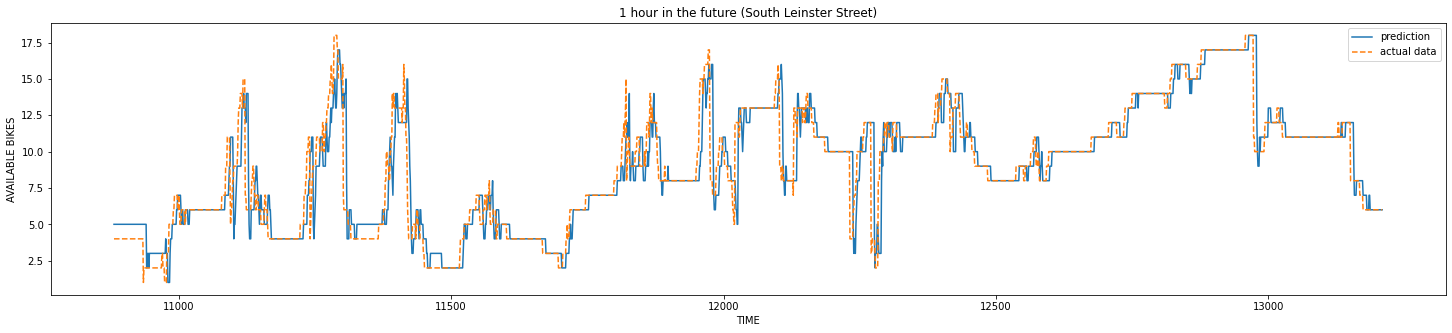

In [442]:
# X = pd.concat((dfSLS['weekday'],dfSLS['Lag_1'],dfSLS['Lag_2'],dfSLS['Lag_3'],dfSLS['Lag_4'],dfSLS['Lag_5'],dfSLS['Lag_6'],dfSLS['Lag_7'],dfSLS['Lag_8'],dfSLS['Lag_9'],
# dfSLS['Lag_10'],dfSLS['Lag_11'],dfSLS['Lag_12'],dfSLS['Lag_13'],dfSLS['Lag_14'],dfSLS['Lag_15'],dfSLS['Lag_16'],dfSLS['Lag_17'],dfSLS['Lag_18'],dfSLS['Lag_19']
# ,dfSLS['Lag_20'],dfSLS['Lag_21'],dfSLS['Lag_22'],dfSLS['Lag_23'],dfSLS['hourly average'],dfSLS['6 hour average'],dfSLS['12 hour average'],dfSLS['daily average']),axis=1)
# X = pd.concat((dfSLS['Lag_1'],dfSLS['Lag_2'],dfSLS['Lag_3'],dfSLS['Lag_4'],dfSLS['Lag_5']
# ,dfSLS['hourly average'],dfSLS['12 hour average'],dfSLS['daily average']),axis=1)
X = pd.concat((dfSLS['Lag_1'],dfSLS['Lag_2'],dfSLS['Lag_3'],dfSLS['Lag_4'],dfSLS['Lag_5']
,dfSLS['hourly average'],dfSLS['daily average']),axis=1)
linRegPrediction(dfSLS,X,6,"1 hour in the future (South Leinster Street)")
baselinePrediction(dfSLS,X,6)

1.208244186660354
[-0.5315887  -0.87072067 -0.81038699 -0.81878728 -0.89097303  4.89774845]
baseline last value:
1.377858709612823


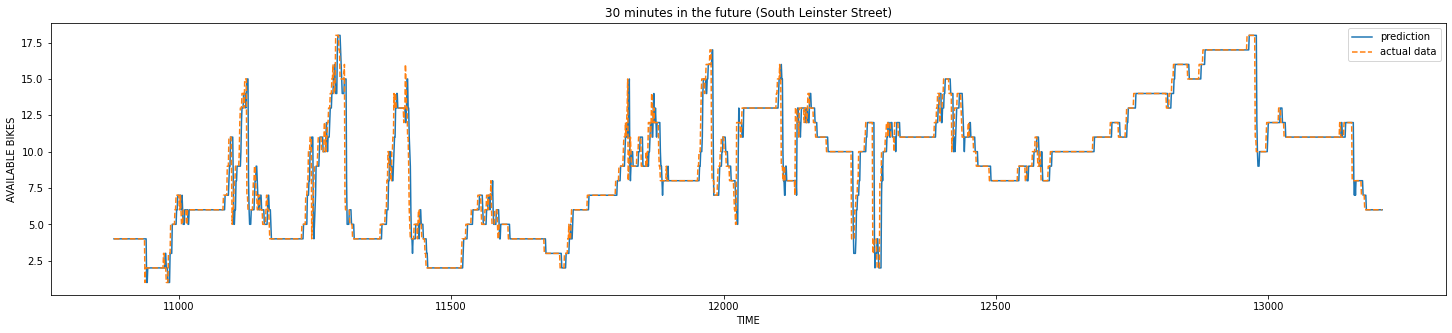

In [443]:
# X = pd.concat((dfSLS['weekday'],dfSLS['Lag_1'],dfSLS['Lag_2'],dfSLS['Lag_3'],dfSLS['Lag_4'],dfSLS['Lag_5'],dfSLS['Lag_6'],dfSLS['Lag_7'],dfSLS['Lag_8'],dfSLS['Lag_9'],
# dfSLS['Lag_10'],dfSLS['Lag_11'],dfSLS['Lag_12'],dfSLS['Lag_13'],dfSLS['Lag_14'],dfSLS['Lag_15'],dfSLS['Lag_16'],dfSLS['Lag_17'],dfSLS['Lag_18'],dfSLS['Lag_19']
# ,dfSLS['Lag_20'],dfSLS['Lag_21'],dfSLS['Lag_22'],dfSLS['Lag_23'],dfSLS['hourly average'],dfSLS['6 hour average'],dfSLS['12 hour average'],dfSLS['daily average']),axis=1)
X = pd.concat((dfSLS['Lag_1'],dfSLS['Lag_2'],dfSLS['Lag_3'],dfSLS['Lag_4'],dfSLS['Lag_5']
,dfSLS['hourly average']),axis=1)
linRegPrediction(dfSLS,X,3,"30 minutes in the future (South Leinster Street)")
baselinePrediction(dfSLS,X,3)

0.7020793504589911
[-0.48533019 -0.80376339 -0.7809015  -0.78664358 -0.790023    4.63781006]
baseline last value:
0.9705593175652703


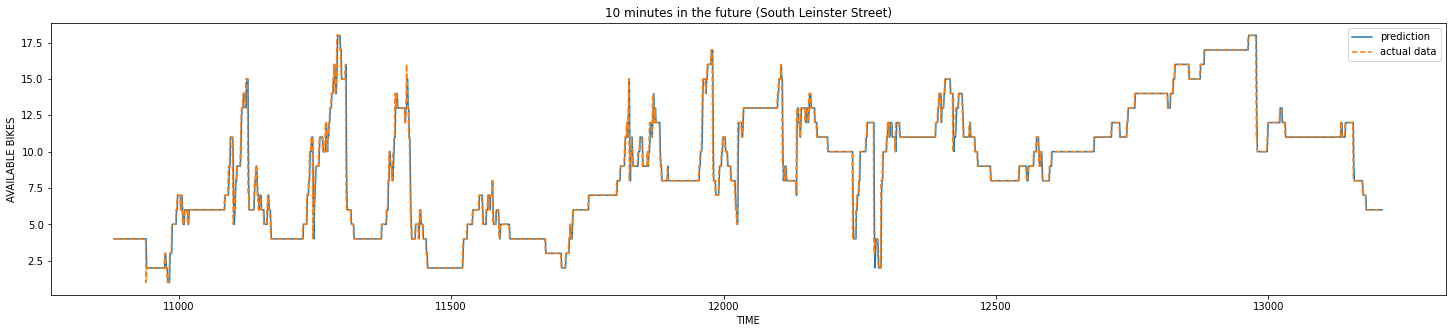

In [444]:
# X = pd.concat((dfSLS['weekday'],dfSLS['Lag_1'],dfSLS['Lag_2'],dfSLS['Lag_3'],dfSLS['Lag_4'],dfSLS['Lag_5'],dfSLS['Lag_6'],dfSLS['Lag_7'],dfSLS['Lag_8'],dfSLS['Lag_9'],
# dfSLS['Lag_10'],dfSLS['Lag_11'],dfSLS['Lag_12'],dfSLS['Lag_13'],dfSLS['Lag_14'],dfSLS['Lag_15'],dfSLS['Lag_16'],dfSLS['Lag_17'],dfSLS['Lag_18'],dfSLS['Lag_19']
# ,dfSLS['Lag_20'],dfSLS['Lag_21'],dfSLS['Lag_22'],dfSLS['Lag_23'],dfSLS['hourly average'],dfSLS['6 hour average'],dfSLS['12 hour average'],dfSLS['daily average']),axis=1)
X = pd.concat((dfSLS['Lag_1'],dfSLS['Lag_2'],dfSLS['Lag_3'],dfSLS['Lag_4'],dfSLS['Lag_5']
,dfSLS['hourly average']),axis=1)
linRegPrediction(dfSLS,X,1,"10 minutes in the future (South Leinster Street)")
baselinePrediction(dfSLS,X,1)

C:\Users\Oliver\AppData\Local\Temp/ipykernel_15516/504939388.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data_gen, epochs=2)


Epoch 1/2
1746/1746 [==============================] - 5s 2ms/step - loss: 28.2008
Epoch 2/2
1746/1746 [==============================] - 3s 2ms/step - loss: 16.8585


C:\Users\Oliver\AppData\Local\Temp/ipykernel_15516/504939388.py:22: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  yPred = model.predict_generator(test_data_gen)


1.2115927489248655


<AxesSubplot:title={'center':'xd'}, xlabel='TIME', ylabel='AVAILABLE BIKES'>

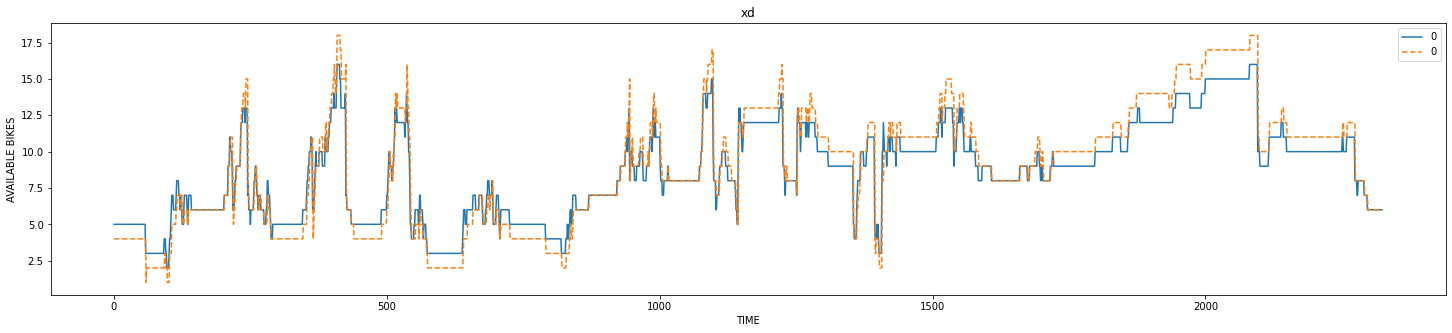

In [18]:
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
X = pd.concat((dfSLS['Lag_1'],dfSLS['Lag_2'],dfSLS['Lag_3'],dfSLS['Lag_4'],dfSLS['Lag_5']
,dfSLS['hourly average']),axis=1)
look_back = 4
batch_size = 4
dfTest = dfSLS.copy()
y = dfTest.loc[:, 'AVAILABLE BIKES'].iloc[432:].shift(-(1)).squeeze()
y = y.fillna(method="pad")
X = X.iloc[432: , :]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
train_data_gen = TimeseriesGenerator(X_train.to_numpy(), y_train.to_numpy(), length=look_back, batch_size=batch_size)
test_data_gen = TimeseriesGenerator(X_test.to_numpy(), y_test.to_numpy(), length=look_back, batch_size=batch_size)

model = Sequential()
model.add(LSTM(20, activation='relu', input_shape=(X_train.shape[0], X_train.shape[1])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(train_data_gen, epochs=2)
yPred = model.predict_generator(test_data_gen)
yPredSliced = yPred.round()
y_test.drop(y_test.tail(4).index,inplace=True)
#reset the index
y_test = y_test.to_numpy()
y_test = pd.DataFrame(y_test)

print(np.sqrt(mean_squared_error(y_test, yPredSliced)))
yPredSliced = pd.DataFrame(yPredSliced.round())
ax = yPredSliced.plot(figsize=(25,5),style='-')
y_test.plot(style='--',figsize=(25,5),xlabel="TIME",ylabel="AVAILABLE BIKES", ax = ax,title="xd")

In [29]:
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
def lstmPrediction(dfInput,X,steps,myTitle):
    y = dfInput.loc[:, 'AVAILABLE BIKES'].iloc[432:].shift(-(steps)).squeeze()
    y = y.fillna(method="pad")
    X = X.iloc[432: , :]
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
    train_data_gen = TimeseriesGenerator(X_train.to_numpy(), y_train.to_numpy(), length=4, batch_size=4)
    test_data_gen = TimeseriesGenerator(X_test.to_numpy(), y_test.to_numpy(), length=4, batch_size=4)

    model = Sequential()
    model.add(LSTM(25, activation='relu', input_shape=(X_train.shape[0], X_train.shape[1])))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit_generator(train_data_gen, epochs=20)
    yPred = model.predict_generator(test_data_gen)
    # print(np.sqrt(mean_squared_error(y_test, yPred)))
    yPred = yPred.round()
    y_test.drop(y_test.tail(4).index,inplace=True)
    #reset the index
    y_test = y_test.to_numpy()
    y_test = pd.DataFrame(y_test)
    yPred = pd.DataFrame(yPred)
    ax = yPred.plot(figsize=(25,5),style='-')
    y_test.plot(style='--',figsize=(25,5),xlabel="TIME",ylabel="AVAILABLE BIKES", ax = ax,title=myTitle)
    plt.legend(["prediction", "actual data"])
    print(np.sqrt(mean_squared_error(y_test, yPred)))

C:\Users\Oliver\AppData\Local\Temp/ipykernel_15516/335754855.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data_gen, epochs=20)


Epoch 1/20
1746/1746 [==============================] - 5s 2ms/step - loss: 49.6506
Epoch 2/20
1746/1746 [==============================] - 4s 2ms/step - loss: 39.7875
Epoch 3/20
1746/1746 [==============================] - 4s 2ms/step - loss: 37.3630
Epoch 4/20
1746/1746 [==============================] - 4s 2ms/step - loss: 34.3601
Epoch 5/20
1746/1746 [==============================] - 4s 2ms/step - loss: 34.8736
Epoch 6/20
1746/1746 [==============================] - 4s 2ms/step - loss: 32.9829
Epoch 7/20
1746/1746 [==============================] - 4s 2ms/step - loss: 32.8054
Epoch 8/20
1746/1746 [==============================] - 4s 2ms/step - loss: 32.2234
Epoch 9/20
1746/1746 [==============================] - 4s 2ms/step - loss: 31.2237
Epoch 10/20
1746/1746 [==============================] - 5s 3ms/step - loss: 31.8860
Epoch 11/20
1746/1746 [==============================] - 3s 2ms/step - loss: 30.6155
Epoch 12/20
1746/1746 [==============================] - 4s 2ms/step - los

C:\Users\Oliver\AppData\Local\Temp/ipykernel_15516/335754855.py:20: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  yPred = model.predict_generator(test_data_gen)


2.1420520761116415
baseline:
1.798650082384856


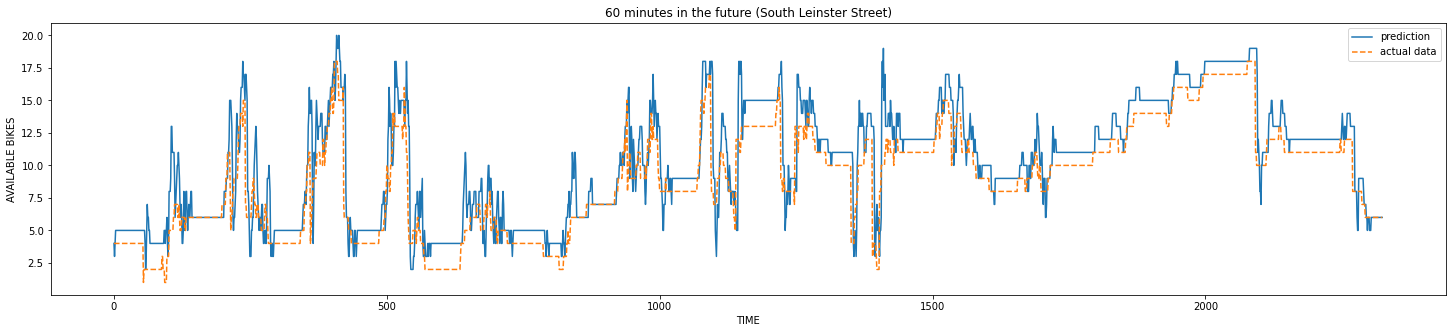

In [39]:
X = pd.concat((dfSLS['Lag_1'],dfSLS['Lag_2'],dfSLS['Lag_3'],dfSLS['Lag_4'],dfSLS['Lag_5']
,dfSLS['hourly average']),axis=1)
lstmPrediction(dfSLS,X,6,"60 minutes in the future (South Leinster Street)")
baselinePrediction(dfSLS,X,6)

C:\Users\Oliver\AppData\Local\Temp/ipykernel_15516/335754855.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data_gen, epochs=20)


Epoch 1/20
1746/1746 [==============================] - 6s 2ms/step - loss: 34.3205
Epoch 2/20
1746/1746 [==============================] - 3s 2ms/step - loss: 24.2438
Epoch 3/20
1746/1746 [==============================] - 3s 2ms/step - loss: 21.9573
Epoch 4/20
1746/1746 [==============================] - 3s 2ms/step - loss: 21.8790
Epoch 5/20
1746/1746 [==============================] - 3s 2ms/step - loss: 22.1452
Epoch 6/20
1746/1746 [==============================] - 3s 2ms/step - loss: 21.1820
Epoch 7/20
1746/1746 [==============================] - 3s 2ms/step - loss: 19.9194
Epoch 8/20
1746/1746 [==============================] - 3s 2ms/step - loss: 20.3260
Epoch 9/20
1746/1746 [==============================] - 3s 2ms/step - loss: 20.9040
Epoch 10/20
1746/1746 [==============================] - 3s 2ms/step - loss: 20.2228
Epoch 11/20
1746/1746 [==============================] - 3s 2ms/step - loss: 20.0767
Epoch 12/20
1746/1746 [==============================] - 3s 2ms/step - los

C:\Users\Oliver\AppData\Local\Temp/ipykernel_15516/335754855.py:20: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  yPred = model.predict_generator(test_data_gen)


0.9571462961627467
baseline:
1.377858709612823


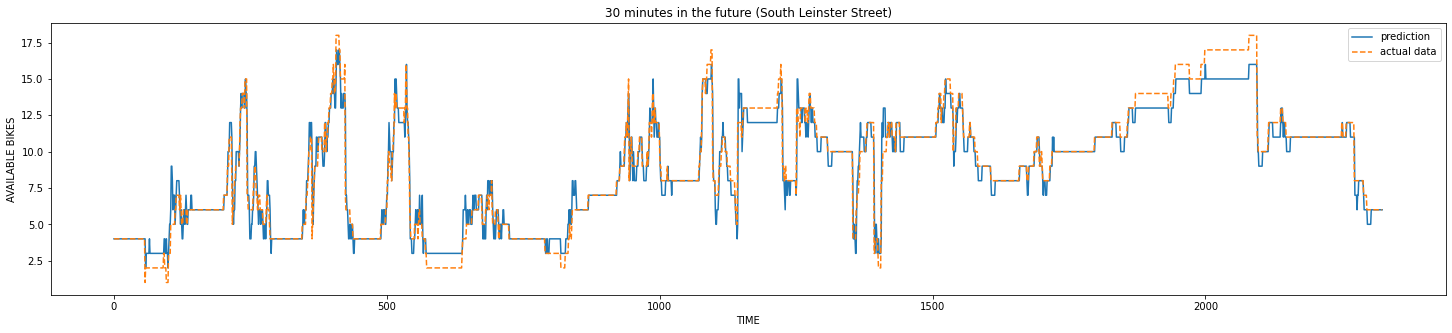

In [32]:
X = pd.concat((dfSLS['Lag_1'],dfSLS['Lag_2'],dfSLS['Lag_3'],dfSLS['Lag_4'],dfSLS['Lag_5']
,dfSLS['hourly average']),axis=1)
lstmPrediction(dfSLS,X,3,"30 minutes in the future (South Leinster Street)")
baselinePrediction(dfSLS,X,3)

C:\Users\Oliver\AppData\Local\Temp/ipykernel_15516/335754855.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data_gen, epochs=20)


Epoch 1/20
1746/1746 [==============================] - 5s 2ms/step - loss: 23.1439
Epoch 2/20
1746/1746 [==============================] - 4s 2ms/step - loss: 16.5341
Epoch 3/20
1746/1746 [==============================] - 4s 2ms/step - loss: 15.9040
Epoch 4/20
1746/1746 [==============================] - 4s 2ms/step - loss: 14.9877
Epoch 5/20
1746/1746 [==============================] - 4s 2ms/step - loss: 14.7487
Epoch 6/20
1746/1746 [==============================] - 5s 3ms/step - loss: 14.3383
Epoch 7/20
1746/1746 [==============================] - 4s 2ms/step - loss: 14.4488
Epoch 8/20
1746/1746 [==============================] - 3s 2ms/step - loss: 13.8846
Epoch 9/20
1746/1746 [==============================] - 3s 2ms/step - loss: 13.2737
Epoch 10/20
1746/1746 [==============================] - 3s 2ms/step - loss: 12.7706
Epoch 11/20
1746/1746 [==============================] - 3s 2ms/step - loss: 12.6073
Epoch 12/20
1746/1746 [==============================] - 3s 2ms/step - los

C:\Users\Oliver\AppData\Local\Temp/ipykernel_15516/335754855.py:20: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  yPred = model.predict_generator(test_data_gen)


1.0053619687316817
baseline:
0.9705593175652703


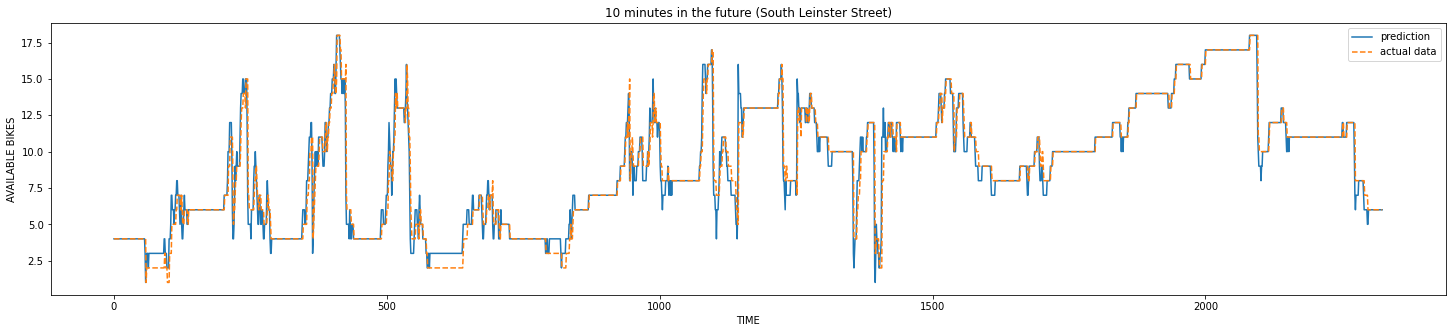

In [33]:
X = pd.concat((dfSLS['Lag_1'],dfSLS['Lag_2'],dfSLS['Lag_3'],dfSLS['Lag_4'],dfSLS['Lag_5']
,dfSLS['hourly average']),axis=1)
lstmPrediction(dfSLS,X,1,"10 minutes in the future (South Leinster Street)")
baselinePrediction(dfSLS,X,1)

C:\Users\Oliver\AppData\Local\Temp/ipykernel_15516/335754855.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data_gen, epochs=20)


Epoch 1/20
1746/1746 [==============================] - 5s 2ms/step - loss: 54.0762
Epoch 2/20
1746/1746 [==============================] - 4s 2ms/step - loss: 46.7083
Epoch 3/20
1746/1746 [==============================] - 4s 2ms/step - loss: 47.0925
Epoch 4/20
1746/1746 [==============================] - 4s 2ms/step - loss: 43.5266
Epoch 5/20
1746/1746 [==============================] - 4s 2ms/step - loss: 44.8644
Epoch 6/20
1746/1746 [==============================] - 4s 2ms/step - loss: 43.6373
Epoch 7/20
1746/1746 [==============================] - 4s 2ms/step - loss: 42.8983
Epoch 8/20
1746/1746 [==============================] - 4s 2ms/step - loss: 43.5575
Epoch 9/20
1746/1746 [==============================] - 4s 2ms/step - loss: 42.4808
Epoch 10/20
1746/1746 [==============================] - 5s 3ms/step - loss: 41.3603
Epoch 11/20
1746/1746 [==============================] - 3s 2ms/step - loss: 42.0893
Epoch 12/20
1746/1746 [==============================] - 3s 2ms/step - los

C:\Users\Oliver\AppData\Local\Temp/ipykernel_15516/335754855.py:20: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  yPred = model.predict_generator(test_data_gen)


3.177745193707172
baseline:
3.9337209111372333


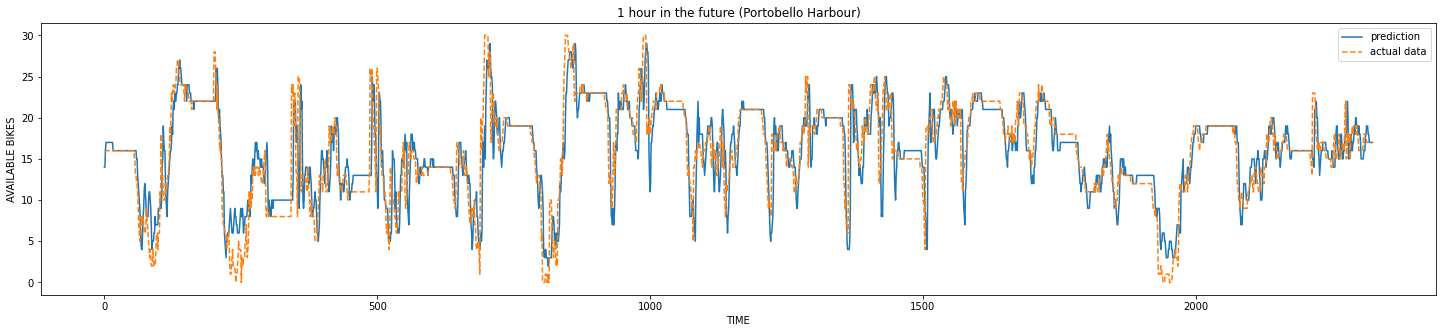

In [34]:
X = pd.concat((dfPortobello['weekday'],dfPortobello['Lag_1'],dfPortobello['Lag_2'],dfPortobello['Lag_3'],dfPortobello['Lag_4'],dfPortobello['Lag_5']
,dfPortobello['hourly average'],dfPortobello['daily average']),axis=1)
lstmPrediction(dfPortobello,X,6,"1 hour in the future (Portobello Harbour)")
baselinePrediction(dfPortobello,X,6)

C:\Users\Oliver\AppData\Local\Temp/ipykernel_15516/335754855.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data_gen, epochs=20)


Epoch 1/20
1746/1746 [==============================] - 5s 2ms/step - loss: 48.4775
Epoch 2/20
1746/1746 [==============================] - 4s 2ms/step - loss: 36.7967
Epoch 3/20
1746/1746 [==============================] - 4s 2ms/step - loss: 34.9892
Epoch 4/20
1746/1746 [==============================] - 4s 2ms/step - loss: 34.7121
Epoch 5/20
1746/1746 [==============================] - 4s 2ms/step - loss: 32.1684
Epoch 6/20
1746/1746 [==============================] - 4s 2ms/step - loss: 32.7533
Epoch 7/20
1746/1746 [==============================] - 4s 2ms/step - loss: 31.7677
Epoch 8/20
1746/1746 [==============================] - 5s 3ms/step - loss: 31.4157
Epoch 9/20
1746/1746 [==============================] - 4s 2ms/step - loss: 30.9306
Epoch 10/20
1746/1746 [==============================] - 4s 2ms/step - loss: 30.0867
Epoch 11/20
1746/1746 [==============================] - 4s 2ms/step - loss: 30.3476
Epoch 12/20
1746/1746 [==============================] - 4s 3ms/step - los

C:\Users\Oliver\AppData\Local\Temp/ipykernel_15516/335754855.py:20: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  yPred = model.predict_generator(test_data_gen)


1.7704868414969874
baseline:
3.111269837220809


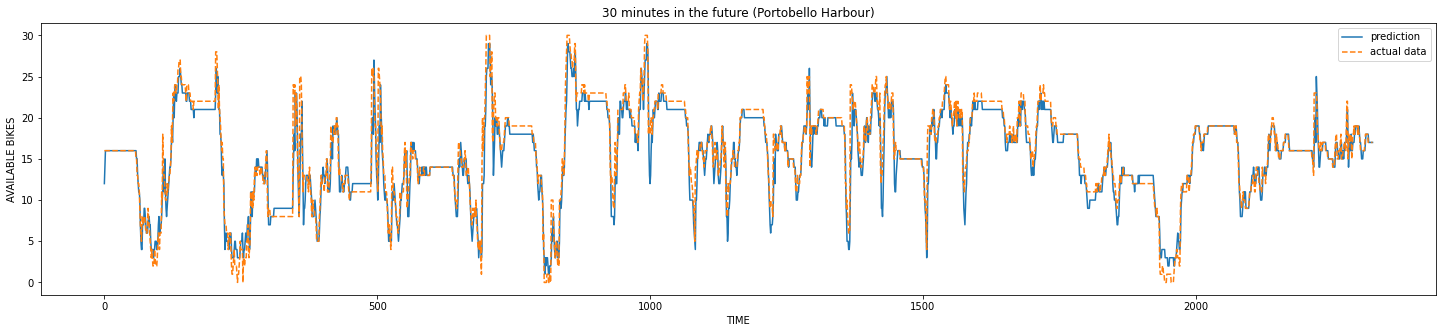

In [35]:
X = pd.concat((dfPortobello['weekday'],dfPortobello['Lag_1'],dfPortobello['Lag_2'],dfPortobello['Lag_3'],dfPortobello['Lag_4'],dfPortobello['Lag_5']
,dfPortobello['hourly average'],dfPortobello['daily average']),axis=1)
lstmPrediction(dfPortobello,X,3,"30 minutes in the future (Portobello Harbour)")
baselinePrediction(dfPortobello,X,3)

C:\Users\Oliver\AppData\Local\Temp/ipykernel_15516/335754855.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data_gen, epochs=20)


Epoch 1/20
1746/1746 [==============================] - 5s 2ms/step - loss: 41.5217
Epoch 2/20
1746/1746 [==============================] - 4s 2ms/step - loss: 30.2403
Epoch 3/20
1746/1746 [==============================] - 3s 2ms/step - loss: 26.3307
Epoch 4/20
1746/1746 [==============================] - 4s 2ms/step - loss: 25.0257
Epoch 5/20
1746/1746 [==============================] - 4s 2ms/step - loss: 23.9872
Epoch 6/20
1746/1746 [==============================] - 4s 2ms/step - loss: 24.2907
Epoch 7/20
1746/1746 [==============================] - 4s 2ms/step - loss: 22.3748
Epoch 8/20
1746/1746 [==============================] - 4s 2ms/step - loss: 22.4355
Epoch 9/20
1746/1746 [==============================] - 3s 2ms/step - loss: 21.7813
Epoch 10/20
1746/1746 [==============================] - 3s 2ms/step - loss: 20.7208
Epoch 11/20
1746/1746 [==============================] - 5s 3ms/step - loss: 21.2222
Epoch 12/20
1746/1746 [==============================] - 4s 2ms/step - los

C:\Users\Oliver\AppData\Local\Temp/ipykernel_15516/335754855.py:20: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  yPred = model.predict_generator(test_data_gen)


1.9952632079044619
baseline:
2.2044218561361877


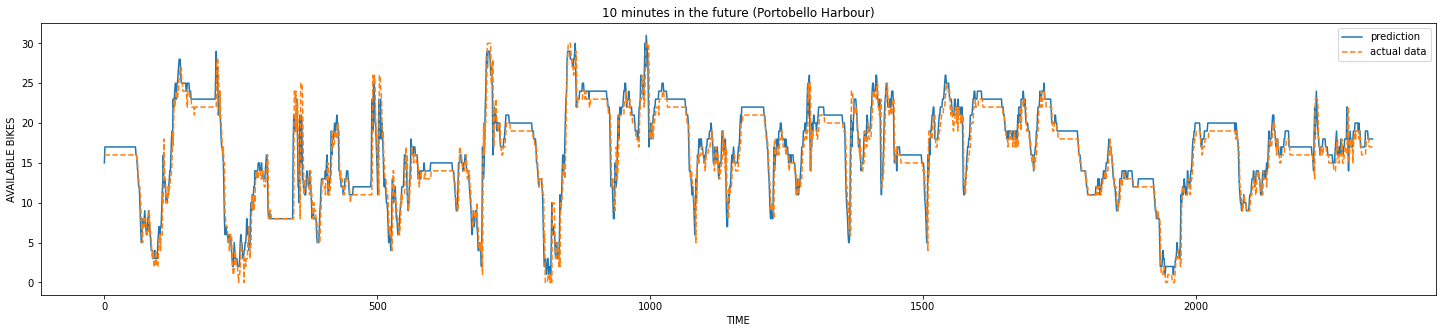

In [36]:
X = pd.concat((dfPortobello['weekday'],dfPortobello['Lag_1'],dfPortobello['Lag_2'],dfPortobello['Lag_3'],dfPortobello['Lag_4'],dfPortobello['Lag_5']
,dfPortobello['hourly average']),axis=1)
lstmPrediction(dfPortobello,X,1,"10 minutes in the future (Portobello Harbour)")
baselinePrediction(dfPortobello,X,1)